<a href="https://colab.research.google.com/github/Beatrizdacruz/Spark_examples/blob/main/examples/estudoSpark_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark==3.0.1 py4j==0.10.9

In [2]:

from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('Estudo_PySpark')\
        .getOrCreate()
csv_file = 'data/Top_1000_Companies_Dataset.csv'
#df = spark.read.csv(csv_file)
df = spark.read.format('csv').options(header='true', inferSchema='true', delimiter = ";").load(csv_file)

df.printSchema()
df.columns


data_schema = [
               StructField('company_name', StringType(), True),
               StructField('url', StringType(), True),
               StructField('city', StringType(), True),
               StructField('state', StringType(), True),
               StructField('country', StringType(), True),
               StructField('employees', IntegerType(), True),
               StructField('linkedin_url', StringType(), True),
               StructField('founded', IntegerType(), True),
               StructField('Industry', StringType(), True),
               StructField('GrowjoRanking', IntegerType(), True),
               StructField('PreviousRanking', IntegerType(), True),
               StructField('estimated_revenues', IntegerType(), True),
               StructField('job_openings', IntegerType(), True),
               StructField('keywords', StringType(), True),
               StructField('LeadInvestors', StringType(), True),
               StructField('Accelerator', StringType(), True),
               StructField('btype', StringType(), True),
               StructField('valuation', StringType(), True),
               StructField('total_funding', StringType(), True),
               StructField('product_url', StringType(), True),
               StructField('indeed_url', StringType(), True),
               StructField('growth_percentage', StringType(), True),
               StructField('contact_info', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv('data/Top_1000_Companies_Dataset.csv',sep = ',', header = True, schema = final_struc)

#data.dtypes
#data.describe().show(5) #mostra as estatísticas
data.show(5)

root
 |-- company_name,url,city,state,country,employees,linkedin_url,founded,Industry,GrowjoRanking,Previous Ranking,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,product_url,indeed_url,growth_percentage,contact_info: string (nullable = true)

+-------------------+-----------+-------------+-----+-------------+---------+--------------------+-------+---------+-------------+---------------+------------------+------------+--------------------+--------------------+-----------+-----+-----------+-------------+--------------------+--------------------+-----------------+--------------------+
|       company_name|        url|         city|state|      country|employees|        linkedin_url|founded| Industry|GrowjoRanking|PreviousRanking|estimated_revenues|job_openings|            keywords|       LeadInvestors|Accelerator|btype|  valuation|total_funding|         product_url|          indeed_url|growth_percentage|        contact_info|
+------------

master()– Se você estiver executando no cluster, precisará usar seu nome mestre como um argumento. normalmente, seria yarn ou mesosdepende da configuração do cluster e também é usado local[X]ao executar no modo autônomo. Xdeve ser um valor inteiro e deve ser maior que 0, que representa quantas partições ele deve criar ao usar RDD, DataFrame e Dataset. Idealmente, o valor Xdeve ser o número de núcleos da CPU.
appName()o método é usado para definir o nome do seu aplicativo.
getOrCreate()o método retorna uma SparkSession existente, caso contrário, cria uma nova SparkSession.

renomear coluna url e remover coluna "contact_info"

In [3]:
data = data.withColumnRenamed('url', 'domain')
data = data.drop('contact_info')
data.show()

+--------------------+-----------------+-------------+-----+-------------+---------+--------------------+-------+--------------+-------------+---------------+------------------+------------+--------------------+--------------------+-----------+-----+-----------+-------------+--------------------+--------------------+-----------------+
|        company_name|           domain|         city|state|      country|employees|        linkedin_url|founded|      Industry|GrowjoRanking|PreviousRanking|estimated_revenues|job_openings|            keywords|       LeadInvestors|Accelerator|btype|  valuation|total_funding|         product_url|          indeed_url|growth_percentage|
+--------------------+-----------------+-------------+-----+-------------+---------+--------------------+-------+--------------+-------------+---------------+------------------+------------+--------------------+--------------------+-----------+-----+-----------+-------------+--------------------+--------------------+--------

consultar dados:
Selecionando apenas empresas que foram fundadas após 2020.

In [ ]:
from pyspark.sql.functions import col, lit

data.filter(col('founded') >= lit('2020')).show()


+---------------+------------------+-------------+-----+--------------------+---------+--------------------+-------+-------------+-------------+---------------+------------------+------------+--------+--------------------+-----------+-----+-----------+-------------+--------------------+--------------------+-----------------+
|   company_name|            domain|         city|state|             country|employees|        linkedin_url|founded|     Industry|GrowjoRanking|PreviousRanking|estimated_revenues|job_openings|keywords|       LeadInvestors|Accelerator|btype|  valuation|total_funding|         product_url|          indeed_url|growth_percentage|
+---------------+------------------+-------------+-----+--------------------+---------+--------------------+-------+-------------+-------------+---------------+------------------+------------+--------+--------------------+-----------+-----+-----------+-------------+--------------------+--------------------+-----------------+
|          Drata|  

buscar empresas que tem entre 500 e 600 funcionários.

In [ ]:
data.filter(data.employees.between(500, 600)).show()

+------------------+--------------------+----------------+-----+-------------+---------+--------------------+-------+--------------+-------------+---------------+------------------+------------+--------------------+--------------------+-----------+-----+-----------+-------------+--------------------+--------------------+-----------------+
|      company_name|              domain|            city|state|      country|employees|        linkedin_url|founded|      Industry|GrowjoRanking|PreviousRanking|estimated_revenues|job_openings|            keywords|       LeadInvestors|Accelerator|btype|  valuation|total_funding|         product_url|          indeed_url|growth_percentage|
+------------------+--------------------+----------------+-----+-------------+---------+--------------------+-------+--------------+-------------+---------------+------------------+------------+--------------------+--------------------+-----------+-----+-----------+-------------+--------------------+-----------------

selecionar compania, indústria, palavras-chave e receita estimada ordenada pela receita (decrescente).

In [ ]:
colunas = ['company_name', 'Industry', 'keywords', 'estimated_revenues']
data.select(*colunas).orderBy(col('estimated_revenues').desc()).show()

+--------------------+---------------+--------------------+------------------+
|        company_name|       Industry|            keywords|estimated_revenues|
+--------------------+---------------+--------------------+------------------+
|Alexandria Real E...|    Real Estate|                null|        2010000000|
|Installed Buildin...|   Construction|                null|        1880000000|
|  Realty Income Corp|    Real Estate|                null|        1820000000|
|         W. P. Carey|    Real Estate|                null|        1280000000|
|     PGT Innovations|      Materials|                null|        1080000000|
|   Aircastle Limited|        Finance|                null|         750000000|
|AdventHealth West...|Hospital/Health|                null|         750000000|
|National Retail P...|    Real Estate|                null|         702430000|
|     GenusPlus Group|   Construction|                null|         616714000|
|     STAG Industrial|    Real Estate| Finance,Real 

Agrupa as empresas por país e conta quantas empresas estão em cada país.

In [ ]:
data.groupBy("country").count().orderBy(col("count").desc()).show()


+-------------+-----+
|      country|count|
+-------------+-----+
|United States|  733|
|           UK|   47|
|          USA|   34|
|        India|   32|
|          CAN|   22|
|         null|   19|
|      Germany|   12|
|       Israel|   11|
|       France|    9|
|       Canada|    5|
|          AUS|    5|
|          Ind|    5|
|       Norway|    4|
|          SWE|    4|
|       Mexico|    4|
|  Switzerland|    4|
|          SGP|    4|
|  Netherlands|    4|
|    Australia|    3|
|  South Korea|    2|
+-------------+-----+
only showing top 20 rows



visualização:

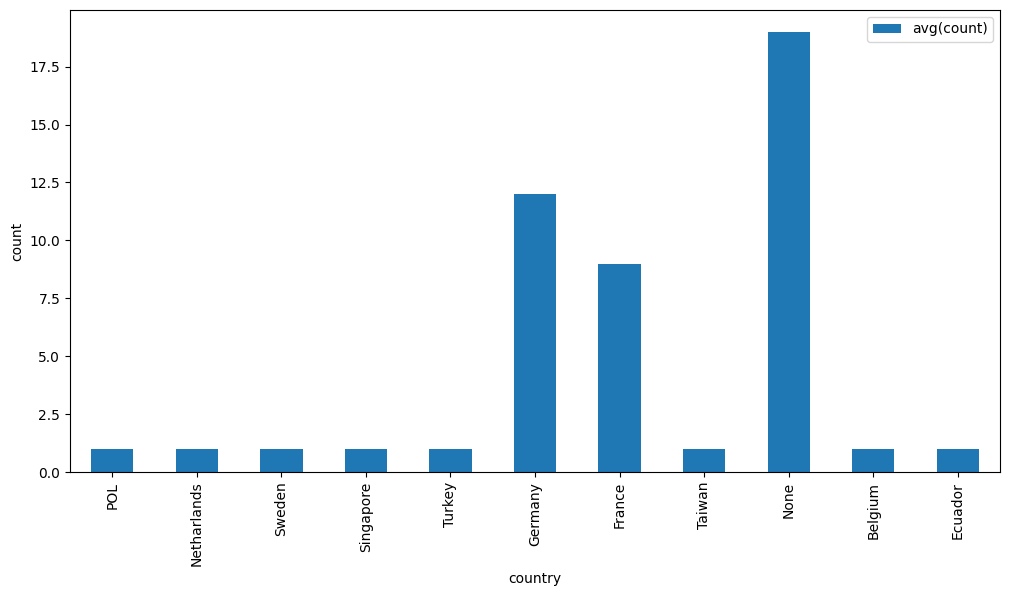

In [28]:
import matplotlib.pyplot as plt


dados_selecionados = data.groupBy("country").count().orderBy(col("count").desc()).groupBy('country')\
                     .mean()\
                     .toPandas()

ind = list(range(12))

ind.pop(6)

dados_selecionados.iloc[ind ,:].plot(kind = 'bar', x='country', y = dados_selecionados.columns.tolist()[1:],
                         figsize=(12, 6), ylabel = 'count', xlabel = 'country')
plt.show()



Agrupando Empresas por estado e cidade.

In [ ]:
data.groupBy("state", "city").count().orderBy(col("count").desc()).show()



+-----+-------------+-----+
|state|         city|count|
+-----+-------------+-----+
|   CA|San Francisco|  136|
|   NY|     New York|  105|
| null|       London|   35|
|   CA|    Palo Alto|   28|
|   MA|       Boston|   22|
|   TX|       Austin|   18|
|   CA|  Los Angeles|   17|
|   WA|      Seattle|   16|
|   CA|Mountain View|   15|
|   IL|      Chicago|   14|
| null|         null|   13|
|   CA|    San Diego|   12|
|   CA| Santa Monica|   10|
|   ON|      Toronto|   10|
|   CA|    San Mateo|    9|
| null|    Bangalore|    9|
|   CA|  Santa Clara|    8|
|   FL|        Miami|    8|
|   GA|      Atlanta|    8|
|   MA|    Cambridge|    7|
+-----+-------------+-----+
only showing top 20 rows



Média de funcionários por país.

In [ ]:
data.groupBy("country").agg({"employees": "avg"}).orderBy(col("avg(employees)").desc()).show()


visualização:

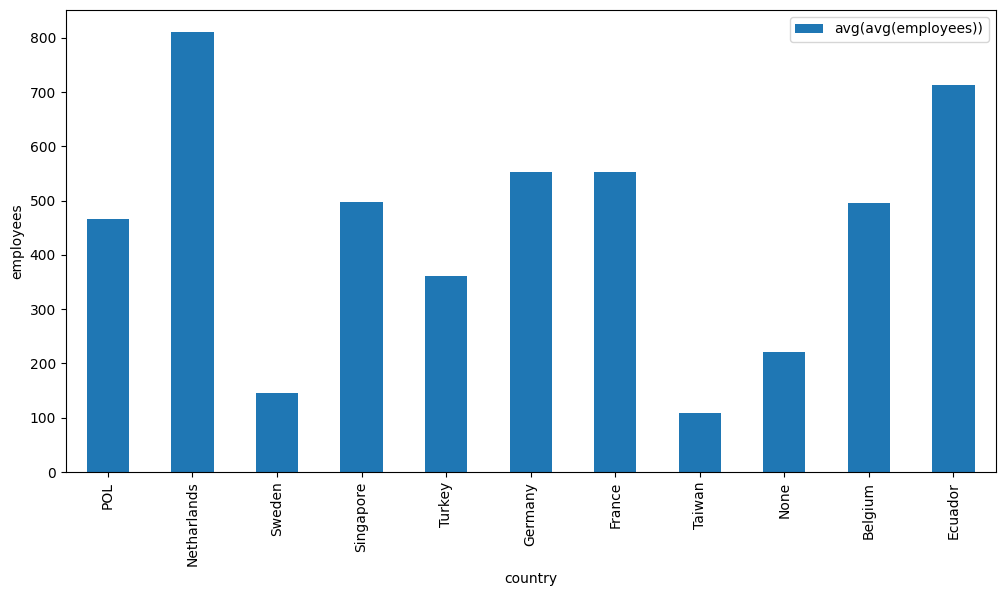

In [31]:
# import matplotlib.pyplot as plt


dados_selecionados = data.groupBy("country").agg({"employees": "avg"}).orderBy(col("avg(employees)").desc()).groupBy('country')\
                     .mean()\
                     .toPandas()

ind = list(range(12))

ind.pop(6)

dados_selecionados.iloc[ind ,:].plot(kind = 'bar', x='country', y = dados_selecionados.columns.tolist()[1:],
                         figsize=(12, 6), ylabel = 'employees', xlabel = 'country')
plt.show()


Analisando empresas por setor:

In [32]:
data.groupBy("Industry").agg({"*": "count"}).withColumnRenamed("count(1)", "count_companies").show()
#média de receita por setor:
data.groupBy("Industry").agg({"estimated_revenues": "avg"}).orderBy(col("avg(estimated_revenues)").desc()).show()

+--------------------+---------------+
|            Industry|count_companies|
+--------------------+---------------+
|             Martech|             12|
|Furniture and Hom...|              1|
|             Telecom|             16|
| Travel Arrangements|              1|
|           Education|              5|
| Hospital/Healthcare|             17|
|       Cybersecurity|              1|
|                Food|             17|
|              Gaming|             10|
|Outsourcing and O...|              1|
|       Entertainment|             10|
|          2620000000|              1|
|         Engineering|              4|
|            Wireless|              5|
|          Energy/Oil|              6|
|               Video|              1|
|              EdTech|             10|
|           Insurance|             15|
|       eCommerceTech|             15|
|            Security|              2|
+--------------------+---------------+
only showing top 20 rows

+---------------+---------------------

visualização:

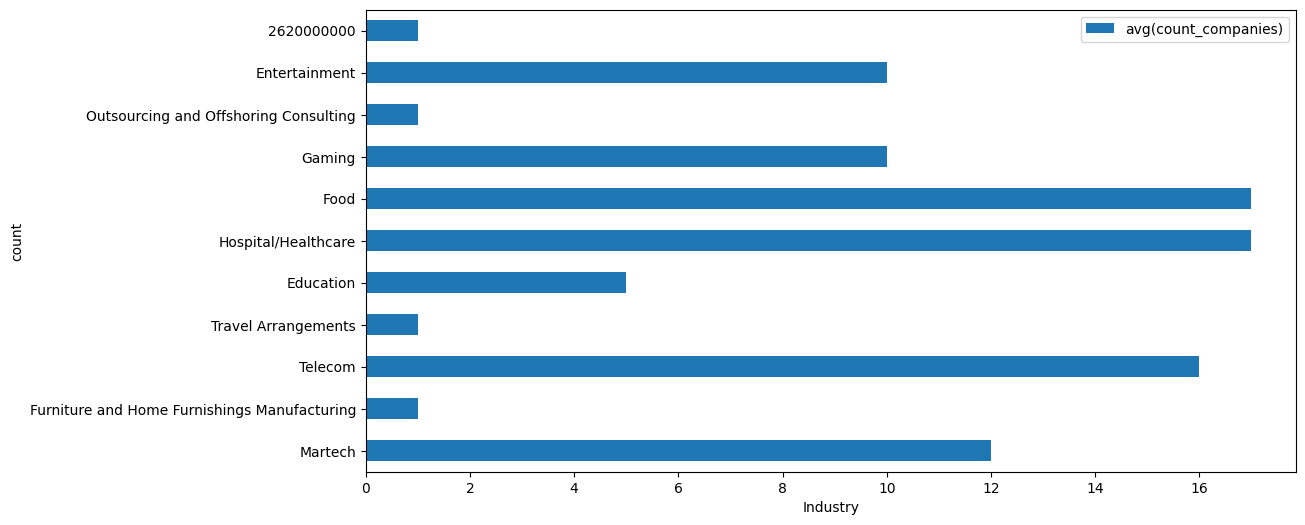

In [41]:
dados_selecionados = data.groupBy("Industry").agg({"*": "count"}).withColumnRenamed("count(1)", "count_companies").groupBy('Industry')\
                     .mean()\
                     .toPandas()


dados_selecionados.iloc[ind ,:].plot(kind = 'barh', x='Industry', y = dados_selecionados.columns.tolist()[1:],
                         figsize=(12, 6), ylabel = 'Industry', xlabel = 'count')
plt.show()



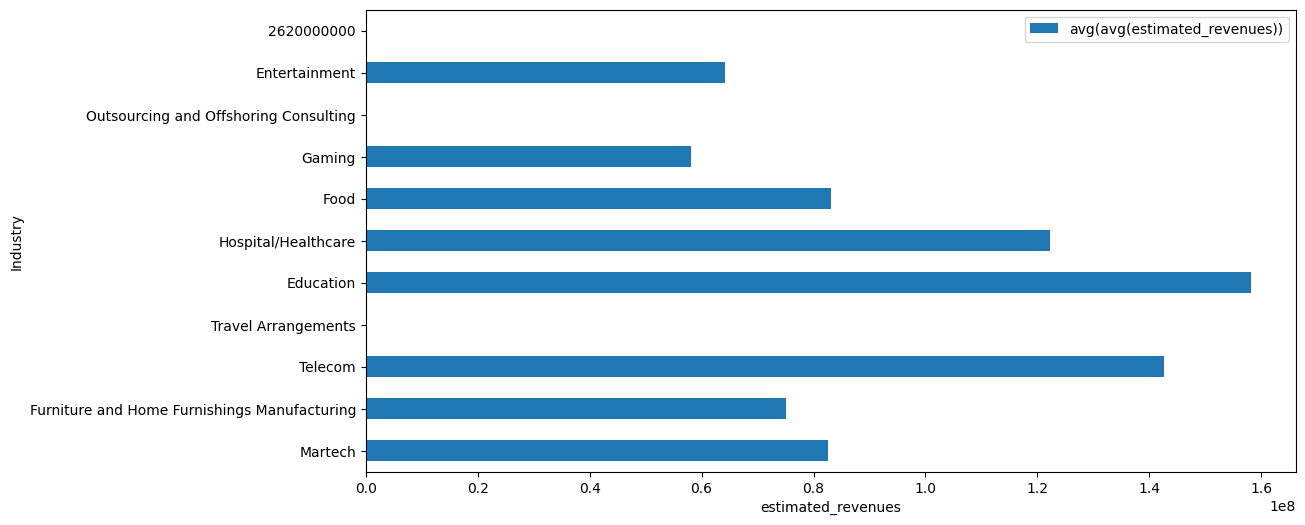

In [43]:
dados_selecionados = data.groupBy("Industry").agg({"estimated_revenues": "avg"}).orderBy(col("avg(estimated_revenues)").desc()).groupBy('Industry')\
                     .mean()\
                     .toPandas()


dados_selecionados.iloc[ind ,:].plot(kind = 'barh', x='Industry', y = dados_selecionados.columns.tolist()[1:],
                         figsize=(12, 6), ylabel = 'Industry', xlabel = 'estimated_revenues')
plt.show()
